In [ ]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import time
import TDMS_MHD as MHD
import pandas as pd
%matplotlib inline


class VaporTubes(MHD.TDMS,MHD.TDMS_pd):
    def __init__(self, ):
        MHD.TDMS.__init__(self) 
        MHD.TDMS_pd.__init__(self)   
    
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx
    
    


In [ ]:
a = VaporTubes()
a.set_pathnames("C:\\Users\\aspit\\OneDrive\\Data\\Excimer\\2018-03-07")
#print(a.pathnames)

In [103]:
filepath = a.pathnames[8]
a.import_data(filepath)
file1 = a.imports[filepath]


In [79]:
file1.groups()

['Common',
 'Wavelength array',
 'Gate Delay Arrays',
 'Integrated emission',
 'Raw_Capture_1',
 'Raw_Capture_2',
 'Raw_Capture_3']

In [104]:
a.get_data_pdframe(file1,'Gate Delay Arrays')
a.get_data_pdframe(file1,'Wavelength array')
a.get_data_pdframe(file1,'Raw_Capture_2')
a.get_data_pdframe(file1,'Raw_Capture_3')

In [105]:
wl = a.datapdframes['Wavelength array']
wl = wl['Wavelength_1'].as_matrix()
timearrays = a.datapdframes['Gate Delay Arrays']
time_run1 = timearrays['Gate Delay2'].as_matrix()
time_run1 = time_run1[~np.isnan(time_run1)]
time_run2 = timearrays['Gate Delay3'].as_matrix()
time_run2 = time_run2[~np.isnan(time_run2)]
df1 = a.datapdframes['Raw_Capture_2']
df2 = a.datapdframes['Raw_Capture_3']

In [ ]:
idx_peak1_l = find_nearest(wl,778)
idx_peak1_r = find_nearest(wl,780.5)

idx_peak2_l = find_nearest(wl,792)
idx_peak2_r = find_nearest(wl,796)

wl_peak1 = wl[idx_peak1_l:idx_peak1_r]
wl_peak2 = wl[idx_peak2_l:idx_peak2_r]

data_peak1_run1 = df1[idx_peak1_l:idx_peak1_r]
data_peak2_run1 = df1[idx_peak2_l:idx_peak2_r]

data_peak1_run2 = df2[idx_peak1_l:idx_peak1_r]
data_peak2_run2 = df2[idx_peak2_l:idx_peak2_r]

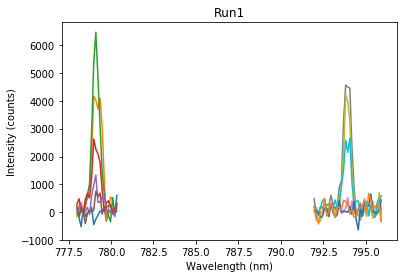

In [136]:
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (counts)")
plt.title("Run1")
plt.plot(wl_peak1,data_peak1_run1)
plt.plot(wl_peak2,data_peak2_run1)

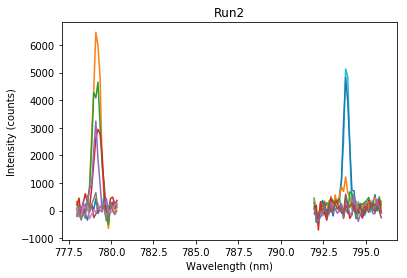

In [137]:
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (counts)")
plt.title("Run2")
plt.plot(wl_peak1,data_peak1_run2)
plt.plot(wl_peak2,data_peak2_run2)

In [108]:
avg_peak1_run1 = []
avg_peak2_run1 = []
avg_peak1_run2 = []
avg_peak2_run2 = []

for frame in data_peak1_run1:
    maximum = data_peak1_run1[frame].max()
    avg_peak1_run1 = np.append(avg_peak1_run1, maximum)
    
for frame in data_peak2_run1:
    maximum = data_peak2_run1[frame].max()
    avg_peak2_run1 = np.append(avg_peak2_run1, maximum)
    
for frame in data_peak1_run2:
    maximum = data_peak1_run2[frame].max()
    avg_peak1_run2 = np.append(avg_peak1_run2, maximum)
    
for frame in data_peak2_run2:
    maximum = data_peak2_run2[frame].max()
    avg_peak2_run2 = np.append(avg_peak2_run2, maximum)
    



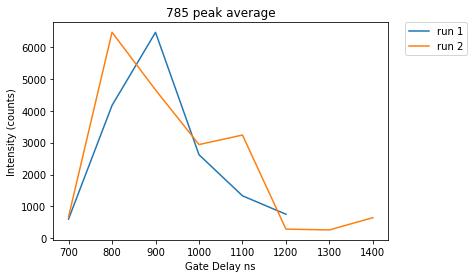

In [131]:
plt.xlabel("Gate Delay (ns)")
plt.ylabel("Intensity (counts)")
plt.title("780 peak average")
plt.plot(time_run1, avg_peak1_run1, label = "run 1")
plt.plot(time_run2, avg_peak1_run2, label = "run 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

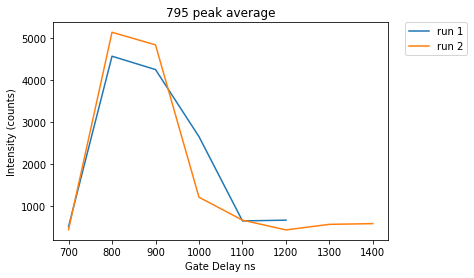

In [135]:
plt.xlabel("Gate Delay (ns)")
plt.ylabel("Intensity (counts)")
plt.title("795 peak average")
plt.plot(time_run1, avg_peak2_run1, label = "run 1")
plt.plot(time_run2, avg_peak2_run2, label = "run 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)